# Data Preprocessing

## Library Imports

In [262]:
# pip install librosa

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree as tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import os
import warnings 
warnings.filterwarnings('ignore')

## Data Imports

In [179]:
df = pd.read_csv('speech_emotions.csv')

## EDA (Exploratory Data Analysis)

In [182]:
df.head()

,Unnamed: 0,set_id,text,gender,age,country
0,0,00026029e0--64991b6eef1fe70609d48edc,The delicious aroma of freshly baked bread fil...,MALE,29,ZA
1,1,00026029e0--64991b72e0daf97163c09c66,I enjoy taking long walks in the peaceful coun...,FEMALE,42,NG
2,2,00026029e0--64991b7fd94c0d5726dec353,The suspenseful novel kept me on the edge of m...,FEMALE,29,VN
3,3,00026029e0--64991b907f82d9763944eba2,They celebrated their anniversary with a roman...,FEMALE,20,PK
4,4,00026029e0--64991bf2ffab6240f9f2418b,The diligent student earned top marks for her ...,MALE,30,PK


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     int64 
 1   set_id      20 non-null     object
 2   text        20 non-null     object
 3   gender      20 non-null     object
 4   age         20 non-null     int64 
 5   country     20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [186]:
df.tail()

,Unnamed: 0,set_id,text,gender,age,country
15,15,00026029e0--64992161e0daf97163c2535a,They celebrated their anniversary with a roman...,MALE,20,PK
16,16,00026029e0--6499219aea5ed167d5bccf6f,The curious child eagerly explored the vast mu...,FEMALE,22,KE
17,17,00026029e0--64992202ea5ed167d5bce5d3,The starry night sky filled their hearts with ...,FEMALE,31,KE
18,18,00026029e0--6499226eef1fe70609d66276,The athlete's dedication and hard work led to ...,MALE,20,PK
19,19,00026029e0--6499261299d64c4c5d32c8e2,The talented musician captivated the audience ...,FEMALE,22,NG


In [188]:
df.describe()

,Unnamed: 0,age
count,20.00000,20.00000
mean,9.50000,25.25000
std,5.91608,6.35672
min,0.00000,18.00000
25%,4.75000,20.00000
50%,9.50000,22.00000
75%,14.25000,30.00000
max,19.00000,42.00000


In [190]:
(df['gender'].value_counts())

gender
FEMALE    11
MALE       9
Name: count, dtype: int64

In [192]:
(df['country'].value_counts())

country
KE    7
PK    5
NG    3
ZA    1
VN    1
IN    1
MX    1
MY    1
Name: count, dtype: int64

In [194]:
os.listdir()

['.ipynb_checkpoints',
 'Ex_Speech emotions_619_-Copy1.ipynb',
 'files',
 'speech recognition.zip',
 'speech_emotions.csv']

## Handling Missing Value

In [197]:
print(df.isnull().sum())


Unnamed: 0    0
set_id        0
text          0
gender        0
age           0
country       0
dtype: int64


In [199]:
print(df.columns)

Index(['Unnamed: 0', 'set_id', 'text', 'gender', 'age', 'country'], dtype='object')


## Feature Engineering

In [203]:
tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(df['text']).toarray()

In [205]:
le_gender = LabelEncoder()

In [207]:
df['gender_encoded'] = le_gender.fit_transform(df['gender'])

In [209]:
X = np.hstack((X_tfidf, df[['age', 'gender_encoded']].values))
y = df['country'] 

## Handling Outlier

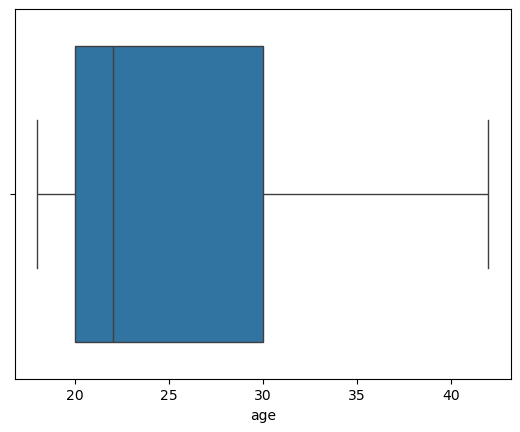

In [212]:
sns.boxplot(x=df['age'])
plt.show()

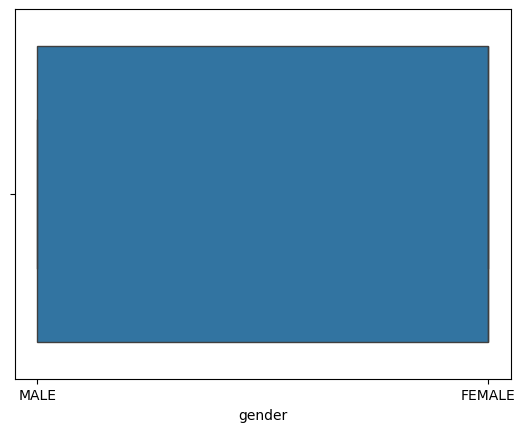

In [214]:
sns.boxplot(x=df['gender'])
plt.show()

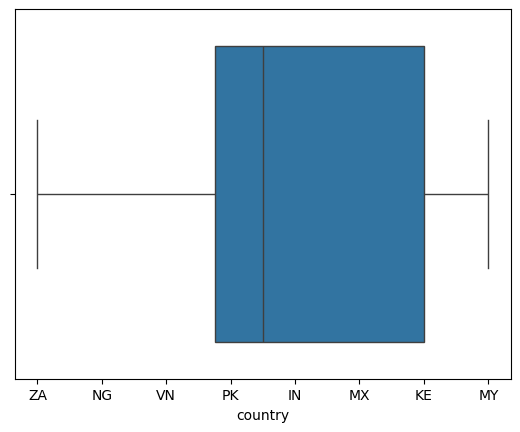

In [215]:
sns.boxplot(x=df['country'])
plt.show()

## Data Visualization

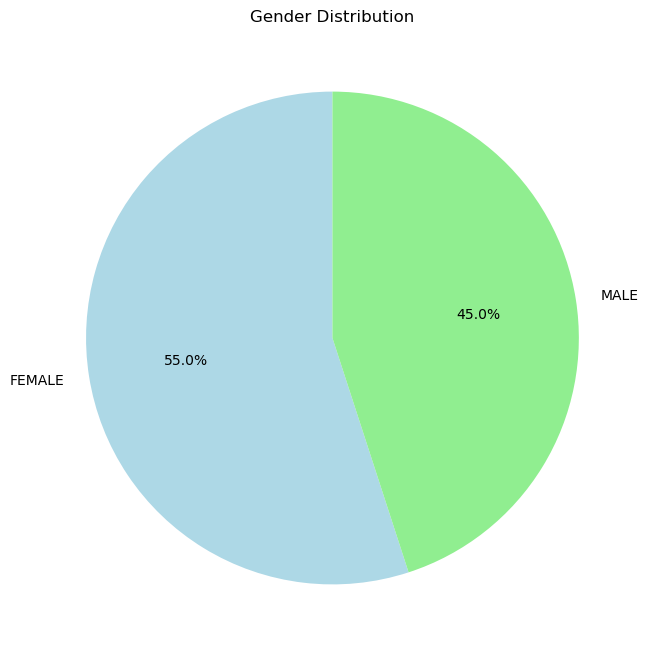

In [219]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90, figsize=(8,8))
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

In [221]:
# sns.countplot(x='gender', data=df)
# # plt.show()

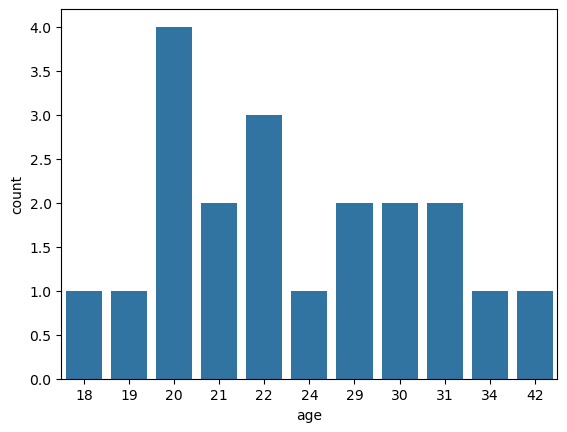

In [223]:
sns.countplot(x='age', data=df)
plt.show()

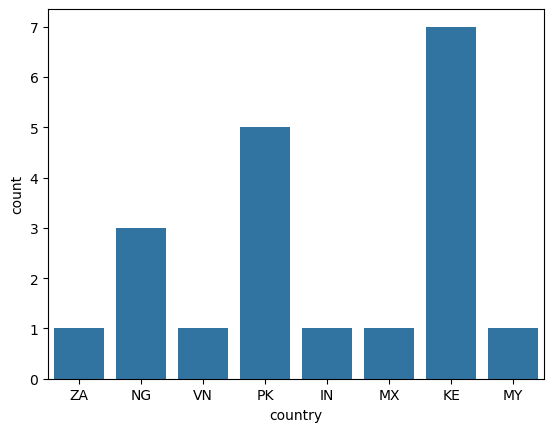

In [224]:
sns.countplot(x='country', data=df)
plt.show()

# Model Building

## Train Test Split 

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [248]:
mod = RandomForestClassifier()

In [250]:
mod.fit(X_train, y_train)

RandomForestClassifier()

## Hyper Parameter Tuining

In [301]:
param_grid = {
    'max_depth': [10, 20, 30, None],     # 'None' means no limit to depth
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],    # Splitting criteria: Gini or Entropy
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}


In [303]:
mod = DecisionTreeClassifier(random_state=42)

In [305]:
grid_search = GridSearchCV(estimator=mod, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)


In [307]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

# Evaluation and Result

In [309]:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [311]:
y_pred = best_model.predict(X_test)

In [313]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

          KE       0.33      1.00      0.50         1
          NG       0.00      0.00      0.00         1
          PK       1.00      1.00      1.00         1
          ZA       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



# Error

# Research